In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# makes the figures higher quality.
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.style.use("markerr.mplstyle")

In [2]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonType
from nba_api.stats.endpoints import playbyplay

In [3]:
nba_teams = teams.get_teams()
jazz = [team for team in nba_teams if team['abbreviation']== 'UTA'][0]['id']

In [4]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=jazz,
                            season_nullable=Season.default,
                            season_type_nullable=SeasonType.regular)  

games_dict = gamefinder.get_normalized_dict()
games = games_dict['LeagueGameFinderResults']
game = games[0]
game_id = game['GAME_ID']
game_matchup = game['MATCHUP']
# home_team, away_team = game_matchup.split(' vs. ')

print(f'Searching through {len(games)} game(s) for the game_id of {game_id} where {game_matchup}')

Searching through 18 game(s) for the game_id of 0022100276 where UTA @ OKC


In [5]:
# Query for the play by play of that most recent regular season game
df = playbyplay.PlayByPlay(game_id).get_data_frames()[0]
df_ = df[['GAME_ID','PERIOD','PCTIMESTRING','SCOREMARGIN']]

df_ = df_.loc[~df_['SCOREMARGIN'].isnull()].reset_index(drop = True)
df_.loc[df_['SCOREMARGIN'] =='TIE','SCOREMARGIN'] = 0
df_ = df_.astype({"SCOREMARGIN": int})
df_.loc[:,'seconds'] = -pd.to_timedelta('00:'+df_.loc[:,'PCTIMESTRING']).astype('timedelta64[s]')


In [5]:
team_colors = {
    'UTA':'#002B5C',# #753BBD OLD JAZZ PURPLE
    'TOR':'#CE1141',
    'ATL':'#E03A3E',
    'BOS':'#007A33',
    'BKN':'#000000',
    'CHA':'#1D1160',
    'CHI':'#CE1141',
    'CLE':'#860038',
    'DAL':'#00538C',
    'DEN':'#FEC524', # #0E2240 PRIMARY BLUE INSTEAD OF THE YELLOW PUT IN #0E2240
    'DET':'#C8102E',
    'GSW':'#1D428A', # #FFC72C THE YELLOW
    'HOU':'#CE1141',
    'IND':'#FDBB30', ##002D62 PACERS BLUE
    'LAC':'#C8102E', 
    'LAL':'#552583', 
    'MEM':'#5D76A9', 
    'MIA':'#98002E', 
    'MIL':'#00471B', 
    'MIN':'#0C2340', #236192 OTHER BLUE #9EA2A2 SILVER
    'NOP':'#0C2340', #C8102E RED #85714D GOLD
    'NYK':'#006BB6', #F58426 ORANGE
    'OKC':'#EF3B24', #EF3B24 orange # light blue #007AC1
    'ORL':'#0077C0', #C4CED4 SILVER
    'PHI':'#006BB6', 
    'PHX':'#E56020', #1D1160 PURPLE
    'POR':'#E03A3E', 
    'SAC':'#5A2D81',
    'SAS':'#C4CED4', 
    'WAS':'#002B5C' #E31837 RED
}

In [6]:

def add_legend(ax_, nba_teams_, home_team_, away_team_, home_color_, away_color_, fgm_bar_color_):
    home_team_name = [team for team in nba_teams_ if team['abbreviation']== home_team_][0]['full_name']
    away_team_name = [team for team in nba_teams_ if team['abbreviation']== away_team_][0]['full_name']
    home_patch = mpatches.Patch(color=home_color_,
                    label=f'{home_team_name} vs.')
    away_patch = mpatches.Patch(color=away_color_, 
                    label=f'{away_team_name}')
    fgm_patch = Line2D([0], [0], color=fgm_bar_color_, 
        label=f'Field Goals Made',lw=3)
    ax_.legend(handles=[home_patch,away_patch,fgm_patch],
        loc='center left', 
        bbox_to_anchor=(-0.03, 1.1),frameon=False,ncol=2,
                title = '',fontsize= 'large')
    return home_team_name, away_team_name


def add_author_line(fig_, ax_, left_text, right_text, color_, pad_left_weight = .5, pad_right_weight = .5, pad_y = 0):
    chartBox = ax_.get_position()
    x0, y0, x1, y1 = chartBox.x0, chartBox.y0, chartBox.x1, chartBox.y1
    pad_left = (fig_.get_figwidth()*x0*pad_left_weight)
    pad_right = (1-x1)*fig_.get_figwidth()*pad_right_weight
    ax_.annotate('', xy=(-pad_left, -0.05+pad_y), xycoords='axes fraction', xytext=(1+pad_right, -0.05+pad_y), color = color_,
        arrowprops=dict(arrowstyle='-', color=color_))
    ax_.annotate(left_text, xy = (1+pad_left, -0.1+pad_y), xycoords='axes fraction', 
        xytext = (-pad_left, -0.1+pad_y), horizontalalignment = 'left', color = color_,
            arrowprops=dict(arrowstyle='-', color='white'))
    ax_.annotate(right_text, xy = (1+pad_right, -0.1+pad_y), xycoords='axes fraction', 
        xytext = (1+pad_right, -0.1+pad_y), horizontalalignment = 'right', color = color_,
            arrowprops=dict(arrowstyle='-', color='white'))

In [23]:
# for game_num in range(len(games)):
#     game = games[game_num]
#     game_id = game['GAME_ID']
#     game_matchup = game['MATCHUP']
#     try:
#         home_team, away_team = game_matchup.split(' vs. ')
#     except ValueError:
#         away_team, home_team = game_matchup.split(' @ ')

#     # Query for the play by play of that most recent regular season game
#     df = playbyplay.PlayByPlay(game_id).get_data_frames()[0]
#     df_ = df[['GAME_ID','PERIOD','PCTIMESTRING','SCOREMARGIN','SCORE']]

#     df_ = df_.loc[~df_['SCOREMARGIN'].isnull()].reset_index(drop = True)
#     df_.loc[df_['SCOREMARGIN'] =='TIE','SCOREMARGIN'] = 0
#     df_ = df_.astype({"SCOREMARGIN": int})
#     df_.loc[:,'quarter_seconds'] = -pd.to_timedelta('00:'+df_.loc[:,'PCTIMESTRING']).astype('timedelta64[s]')
#     df_.loc[:,'total_seconds'] = -720 * (4-df_.loc[:,'PERIOD']) + df_.loc[:,'quarter_seconds']
#     home_color = team_colors[home_team]
#     away_color = team_colors[away_team]

#     color_dict = {1:home_color,-1:away_color,0:'green'}
#     fig, ax = plt.subplots()
#     for row in df_.index[0:-1]:
#         seconds_left = df_.loc[row,'total_seconds']
#         score_margin = df_.loc[row,'SCOREMARGIN']
#         seconds_right = df_.loc[row+1,'total_seconds']

#         g = ax.bar(x = seconds_left, 
#             height = score_margin, 
#             width = (seconds_right-seconds_left),
#             align='edge', color = color_dict[np.sign(score_margin)]
#             )
#     blacks = ['#212121']
#     ax.axhline(0, color = blacks[0], linewidth = 2)

#     # remove x axis grid lines that were cluttering the graph
#     # ax.grid(b = None, axis = 'x')
#     ax.set_xticks([-2880,-2160,-1444,-720,0])
#     ax.set_title(game_matchup)
#     plt.show()


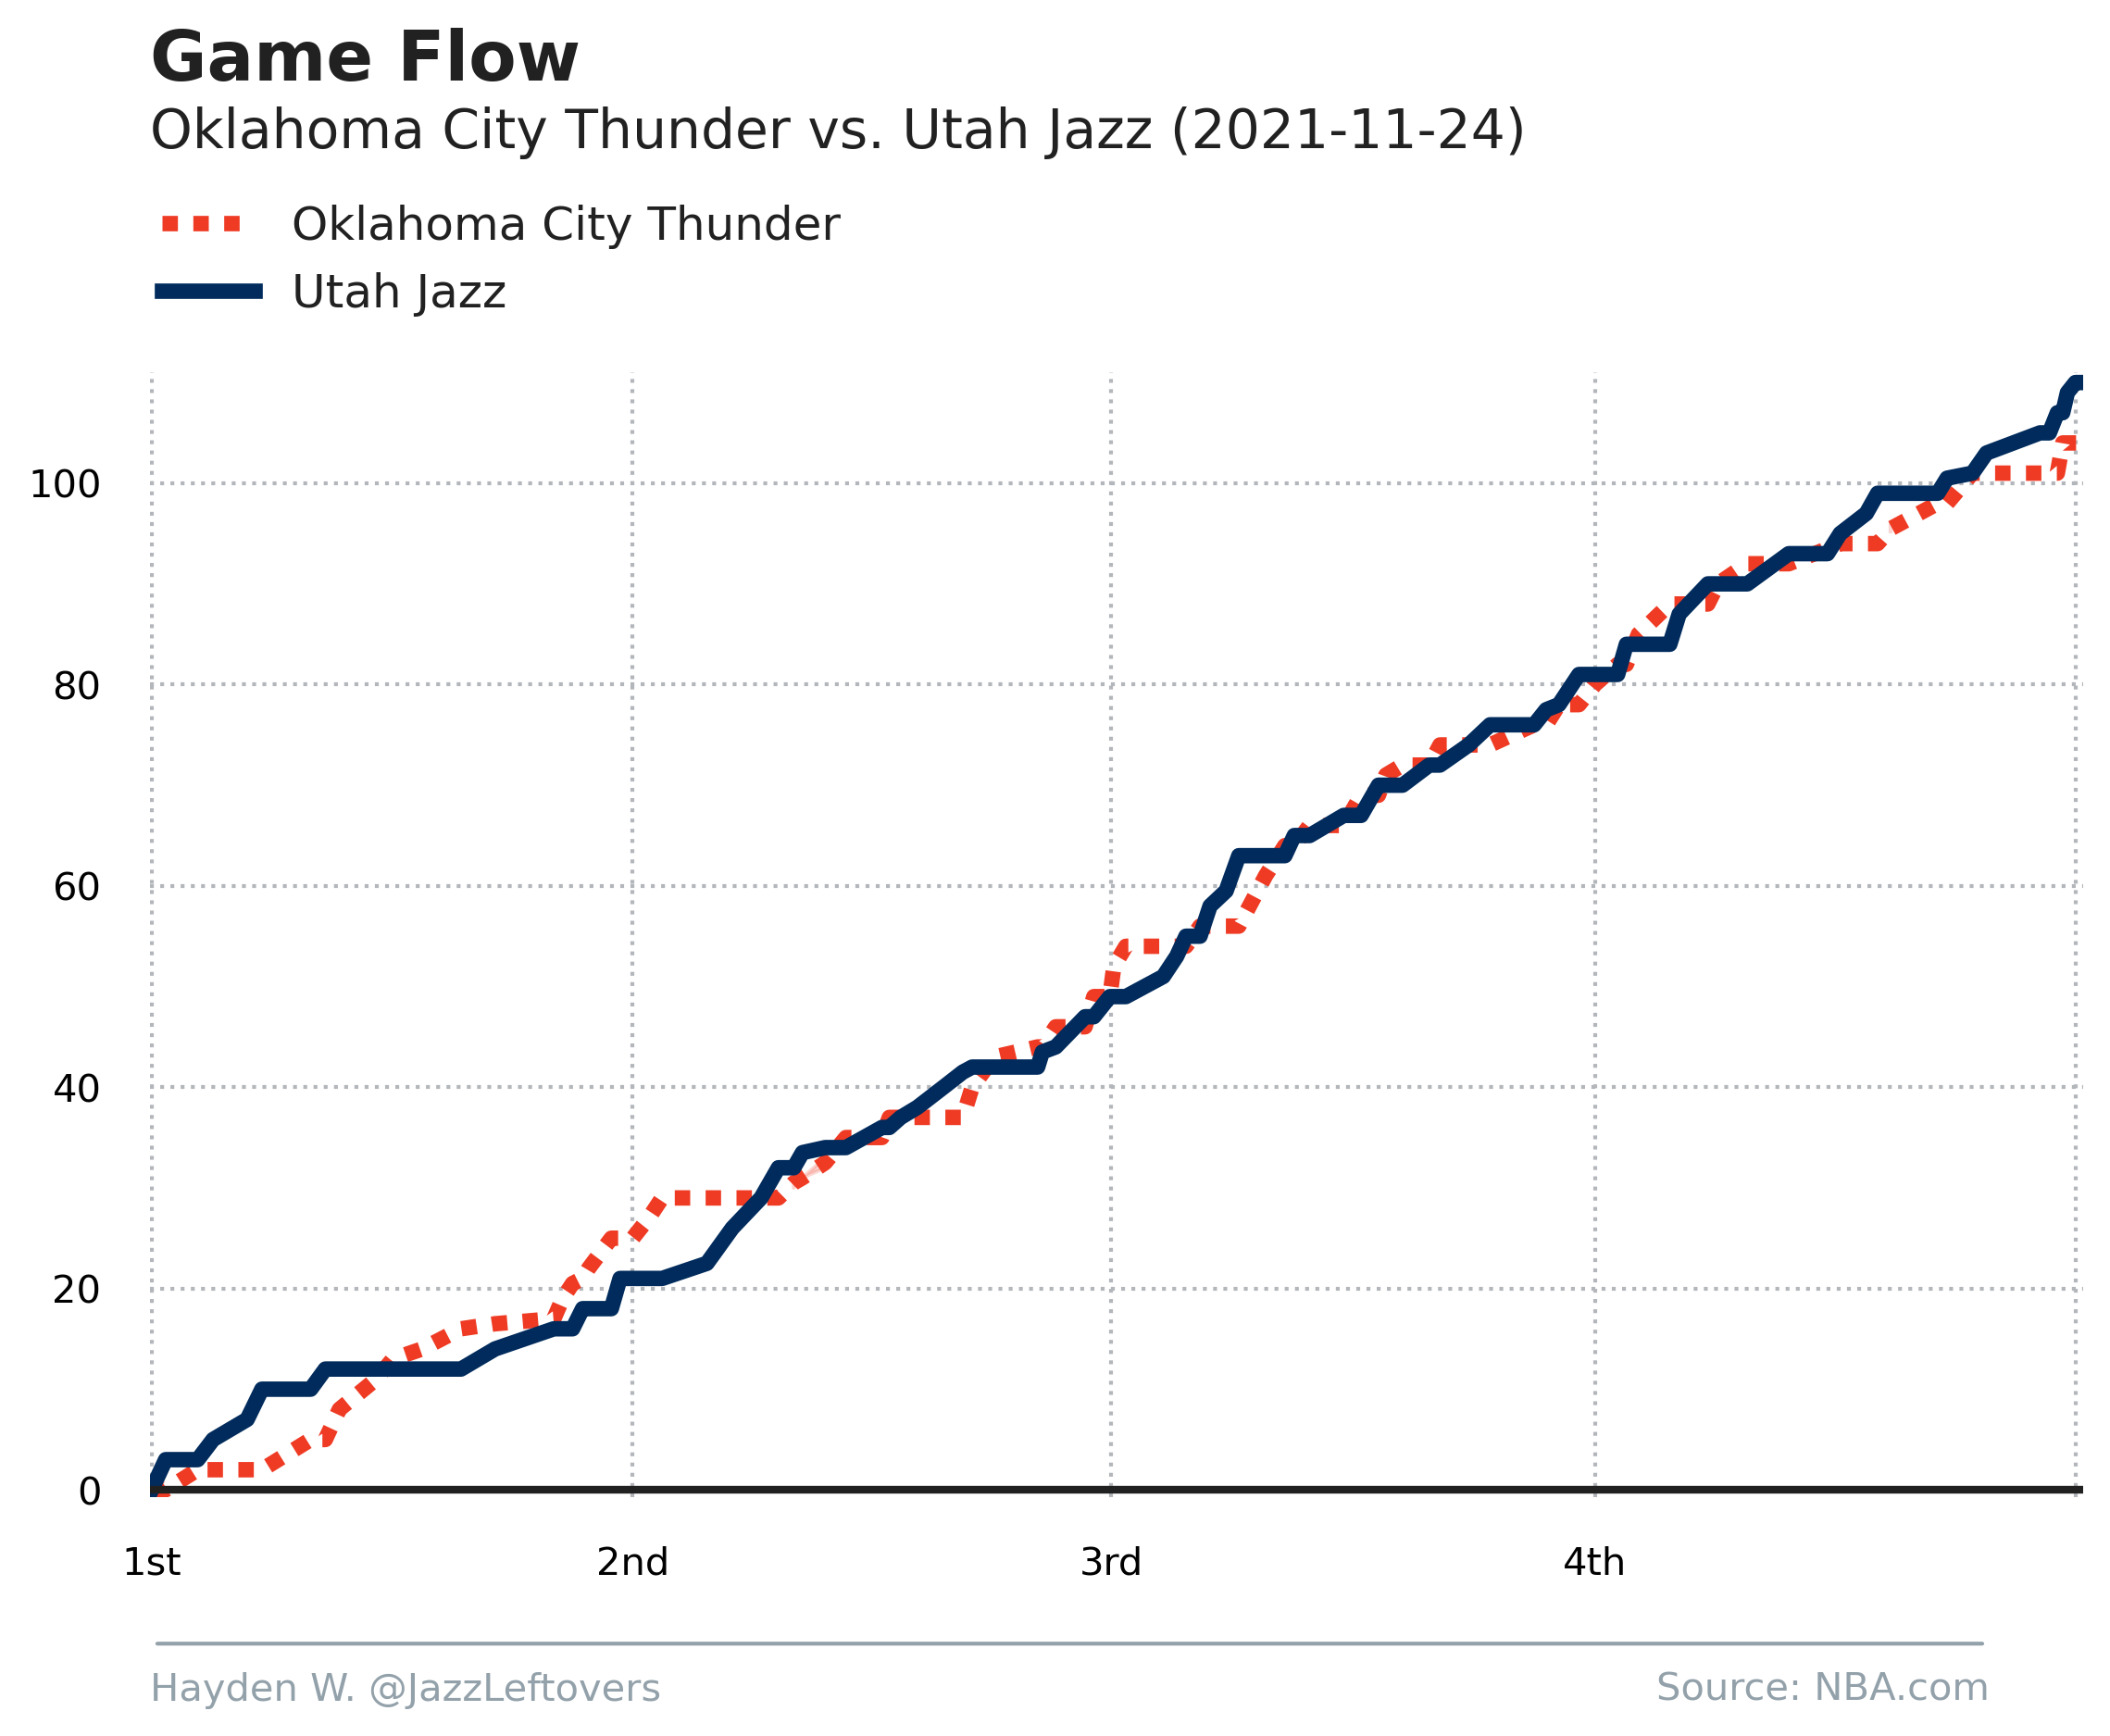

In [7]:
for game_num in range(len(games[:1])):
    game = games[game_num]
    game_id = game['GAME_ID']
    game_day = game['GAME_DATE']

    game_matchup = game['MATCHUP']
    try:
        home_team, away_team = game_matchup.split(' vs. ')
    except ValueError:
        away_team, home_team = game_matchup.split(' @ ')

    # Query for the play by play of that most recent regular season game
    df = playbyplay.PlayByPlay(game_id).get_data_frames()[0]
    df_ = df[['GAME_ID','PERIOD','PCTIMESTRING','SCOREMARGIN','SCORE']]

    df_ = df_.loc[~df_['SCOREMARGIN'].isnull()].reset_index(drop = True)
    df_.loc[df_['SCOREMARGIN'] =='TIE','SCOREMARGIN'] = 0
    df_ = df_.astype({"SCOREMARGIN": int})
    df_.loc[:,'away_score'] = df_.loc[:,'SCORE'].str.split(' - ',expand=True)[0]
    df_.loc[:,'home_score'] = df_.loc[:,'SCORE'].str.split(' - ',expand=True)[1]
    df_ = df_.astype({"away_score": int,"home_score": int})
    df_.loc[:,'quarter_seconds'] = -pd.to_timedelta('00:'+df_.loc[:,'PCTIMESTRING']).astype('timedelta64[s]')
    df_.loc[:,'total_seconds'] = -720 * (4-df_.loc[:,'PERIOD']) + df_.loc[:,'quarter_seconds']
    new_row = pd.DataFrame({'total_seconds':-2880, 'away_score':0, 'home_score':0},index =[0])
    df_ = pd.concat([new_row, df_]).reset_index(drop = True)
    home_color = team_colors[home_team]
    away_color = team_colors[away_team]
    color_dict = {1:home_color,-1:away_color,0:'green'}
    home_team_name = [team for team in nba_teams if team['abbreviation']== home_team][0]['full_name']
    away_team_name = [team for team in nba_teams if team['abbreviation']== away_team][0]['full_name']
    fig, ax = plt.subplots(figsize = (8,5))
    if df_.home_score.max() > df_.away_score.max():
        sns.lineplot(data = df_, x = 'total_seconds', y = 'home_score',ax = ax, color = home_color, lw=4)
        sns.lineplot(data = df_, x = 'total_seconds', y = 'away_score',ax = ax, color = away_color, lw=4, linestyle = (0, (1, 1)))
        home_patch = Line2D([0], [0], color=home_color,
                            label=f'{home_team_name}',lw=4)
        away_patch = Line2D([0], [0], color=away_color, 
                            label=f'{away_team_name}',lw=4, linestyle = (0, (1, 1)))
    else:
        sns.lineplot(data = df_, x = 'total_seconds', y = 'home_score',ax = ax, color = home_color, lw=4, linestyle = (0, (1, 1)))
        sns.lineplot(data = df_, x = 'total_seconds', y = 'away_score',ax = ax, color = away_color, lw=4)
        home_patch = Line2D([0], [0], color=home_color,
                            label=f'{home_team_name}',lw=4, linestyle = (0, (1, 1)))
        away_patch = Line2D([0], [0], color=away_color, 
                            label=f'{away_team_name}',lw=4)

    blacks = ['#212121']
    ax.axhline(0, color = blacks[0], linewidth = 2)
    ax.set_xticks([-2880,-2160,-1444,-720,0])
    ax.set_xticklabels(['1st','2nd','3rd','4th',''])
    ax.set_xlabel('')

    ax.set_ylabel('')
    ax.set_xlim([-2883,10])
    ax.set_ylim([-.75,max(df_.away_score.max(),df_.home_score.max())+1])
    ax.text(0, 1.26, "Game Flow", 
        transform=ax.transAxes, ha="left", fontsize = 18, fontweight = 'bold', color = '#212121')
    ax.text(0, 1.2, f'{home_team_name} vs. {away_team_name} ({game_day})', 
        transform=ax.transAxes, ha="left", fontsize = 14, color = '#212121')
    # plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    plt.legend(handles=[home_patch,away_patch],
            loc='center left', 
            bbox_to_anchor=(-0.015, 1.1),frameon=False,ncol=1,
                    title = '',fontsize= 'large')
    add_author_line(fig, ax, 'Hayden W. @JazzLeftovers', 'Source: NBA.com', '#93A1AA',0,-0.12,-.08)
    plt.show()
